In [1]:
!unzip '/content/Project-10-Regression-World-Happiness-Report.zip'

Archive:  /content/Project-10-Regression-World-Happiness-Report.zip
  inflating: sample_submission.csv   
  inflating: train_data.csv          
  inflating: test_data.csv           


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install category_encoders
import category_encoders as ce

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df_train = pd.read_csv('/content/train_data.csv')
df_test = pd.read_csv('/content/test_data.csv')

In [4]:
df_train.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
0,Jordan,2008,9.343,0.766,64.22,NaN,-0.127,0.709,0.669,0.331,862,4.930
1,Estonia,2013,10.299,0.901,67.48,0.754,-0.201,0.726,0.702,0.199,534,5.367
2,Sweden,2018,10.881,0.931,72.60,0.942,0.077,0.263,0.823,0.161,1649,7.375
3,Tajikistan,2006,7.554,0.724,60.64,0.702,-0.088,0.768,0.566,0.195,1682,4.613
4,Kuwait,2014,10.945,NaN,65.80,NaN,NaN,NaN,NaN,NaN,925,6.180


In [5]:
df_train.shape

(1559, 12)

In [6]:
df_test.shape

(390, 11)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1533 non-null   float64
 3   Social support                    1549 non-null   float64
 4   Healthy life expectancy at birth  1522 non-null   float64
 5   Freedom to make life choices      1537 non-null   float64
 6   Generosity                        1488 non-null   float64
 7   Perceptions of corruption         1473 non-null   float64
 8   Positive affect                   1542 non-null   float64
 9   Negative affect                   1545 non-null   float64
 10  ID                                1559 non-null   int64  
 11  Life Ladder                       1559 non-null   float64
dtypes: flo

In [8]:
len(df_train['Country name'].value_counts())

165

In [9]:
len(df_train['year'].value_counts())

16

In [10]:
df_train['year'].value_counts()

year
2012    119
2015    116
2017    115
2014    114
2018    111
2019    111
2013    109
2011    109
2016    108
2010     96
2009     96
2008     89
2007     87
2020     79
2006     77
2005     23
Name: count, dtype: int64

In [11]:
df_train[df_train['Log GDP per capita']== 0]

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder


In [12]:
len(df_train[df_train['Log GDP per capita'].isnull()])

26

In [13]:
df_train['Log GDP per capita'] = df_train.groupby('Country name')['Log GDP per capita'].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [14]:
len(df_train[df_train['Log GDP per capita'].isnull()])

11

In [15]:
df_train[df_train['Log GDP per capita'].isnull()]

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
84,Somalia,2014,NaN,0.611,49.60,0.874,NaN,0.456,0.834,0.207,1559,5.528
114,North Cyprus,2015,NaN,0.791,NaN,0.785,NaN,0.659,0.702,0.319,1283,5.843
187,Somaliland region,2012,NaN,0.786,NaN,0.758,NaN,0.334,0.735,0.152,1565,5.057
224,Somaliland region,2011,NaN,0.788,NaN,0.858,NaN,0.357,0.749,0.122,1564,4.931
291,Cuba,2006,NaN,0.970,68.44,0.281,NaN,NaN,0.647,0.277,423,5.418
478,South Sudan,2017,NaN,0.557,51.00,0.456,NaN,0.761,0.586,0.517,1599,2.817
789,Somaliland region,2009,NaN,0.880,NaN,0.746,NaN,0.513,0.819,0.112,1562,4.991
951,Somaliland region,2010,NaN,0.829,NaN,0.820,NaN,0.471,0.769,0.083,1563,4.657
1331,North Cyprus,2014,NaN,0.802,NaN,0.830,NaN,0.692,0.724,0.311,1282,5.786
1377,South Sudan,2016,NaN,0.532,50.60,0.440,NaN,0.785,0.615,0.549,1598,2.888


In [16]:
df_train[df_train['Country name']=='Somalia']

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
84,Somalia,2014,NaN,0.611,49.6,0.874,NaN,0.456,0.834,0.207,1559,5.528


In [17]:
df_train['Log GDP per capita'] = df_train['Log GDP per capita'].fillna(df_train['Log GDP per capita'].median())

In [18]:
df_train['Log GDP per capita'].isnull().sum()

0

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1559 non-null   float64
 3   Social support                    1549 non-null   float64
 4   Healthy life expectancy at birth  1522 non-null   float64
 5   Freedom to make life choices      1537 non-null   float64
 6   Generosity                        1488 non-null   float64
 7   Perceptions of corruption         1473 non-null   float64
 8   Positive affect                   1542 non-null   float64
 9   Negative affect                   1545 non-null   float64
 10  ID                                1559 non-null   int64  
 11  Life Ladder                       1559 non-null   float64
dtypes: flo

In [20]:
df_train['Social support'] = df_train.groupby('Country name')['Social support'].transform(lambda x: x.fillna(x.median()))
df_train['Healthy life expectancy at birth'] = df_train.groupby('Country name')['Healthy life expectancy at birth'].transform(lambda x: x.fillna(x.median()))
df_train['Freedom to make life choices'] = df_train.groupby('Country name')['Freedom to make life choices'].transform(lambda x: x.fillna(x.median()))
df_train['Generosity'] = df_train.groupby('Country name')['Generosity'].transform(lambda x: x.fillna(x.median()))
df_train['Positive affect'] = df_train.groupby('Country name')['Positive affect'].transform(lambda x: x.fillna(x.median()))
df_train['Negative affect'] = df_train.groupby('Country name')['Negative affect'].transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1559 non-null   float64
 3   Social support                    1559 non-null   float64
 4   Healthy life expectancy at birth  1537 non-null   float64
 5   Freedom to make life choices      1559 non-null   float64
 6   Generosity                        1548 non-null   float64
 7   Perceptions of corruption         1473 non-null   float64
 8   Positive affect                   1558 non-null   float64
 9   Negative affect                   1558 non-null   float64
 10  ID                                1559 non-null   int64  
 11  Life Ladder                       1559 non-null   float64
dtypes: flo

In [22]:
for col in df_train.columns:
  if df_train[col].dtype != 'object':
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1559 non-null   float64
 3   Social support                    1559 non-null   float64
 4   Healthy life expectancy at birth  1559 non-null   float64
 5   Freedom to make life choices      1559 non-null   float64
 6   Generosity                        1559 non-null   float64
 7   Perceptions of corruption         1559 non-null   float64
 8   Positive affect                   1559 non-null   float64
 9   Negative affect                   1559 non-null   float64
 10  ID                                1559 non-null   int64  
 11  Life Ladder                       1559 non-null   float64
dtypes: flo

In [24]:
target_encoder = ce.TargetEncoder(cols=['Country name'])

# Fit and transform the data
df_encoded = target_encoder.fit_transform(df_train['Country name'], df_train['Life Ladder'])

# Join the encoded data with the original DataFrame
df_train = df_train.join(df_encoded.add_suffix('_encoded'))

In [25]:
df_train

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder,Country name_encoded
0,Jordan,2008,9.343,0.7660,64.220,0.7620,-0.127,0.709,0.6690,0.331,862,4.930,5.373657
1,Estonia,2013,10.299,0.9010,67.480,0.7540,-0.201,0.726,0.7020,0.199,534,5.367,5.529857
2,Sweden,2018,10.881,0.9310,72.600,0.9420,0.077,0.263,0.8230,0.161,1649,7.375,6.060130
3,Tajikistan,2006,7.554,0.7240,60.640,0.7020,-0.088,0.768,0.5660,0.195,1682,4.613,5.303232
4,Kuwait,2014,10.945,0.8575,65.800,0.8315,-0.040,0.804,0.7205,0.293,925,6.180,5.652772
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,Moldova,2013,9.192,0.8030,62.260,0.6580,-0.069,0.941,0.5820,0.261,1130,5.756,5.523219
1555,North Macedonia,2015,9.613,0.7660,65.145,0.6600,-0.047,0.824,0.6200,0.299,1294,4.976,5.361408
1556,Jordan,2005,9.246,0.9200,63.500,0.7620,-0.122,0.670,0.6960,0.240,860,6.295,5.373657
1557,Rwanda,2012,7.428,0.6370,57.440,0.8350,-0.012,0.081,0.7030,0.132,1459,3.333,4.993181


In [27]:
df_train.drop(['Country name'], axis=1, inplace=True)

<Axes: >

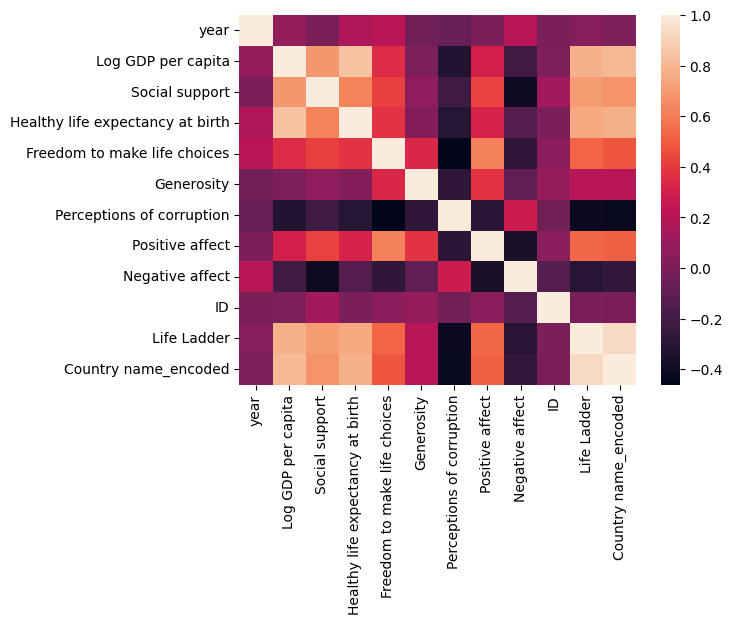

In [29]:
sns.heatmap(df_train.corr())

In [30]:
df_train.describe()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder,Country name_encoded
count,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000
mean,2013.131495,9.366638,0.812817,63.381021,0.742822,0.000652,0.751324,0.708217,0.267850,974.962797,5.469321,5.479485
std,4.206026,1.154847,0.118560,7.403425,0.142300,0.162456,0.181928,0.107772,0.084215,562.023107,1.113280,0.299022
min,2005.000000,6.635000,0.290000,32.300000,0.260000,-0.335000,0.035000,0.322000,0.083000,0.000000,2.375000,4.885531
25%,2010.000000,8.465500,0.753000,58.700000,0.647000,-0.113500,0.699500,0.623000,0.206500,494.500000,4.649500,5.244103
50%,2013.000000,9.457500,0.836000,65.200000,0.764000,-0.024000,0.804000,0.721000,0.259000,973.000000,5.374000,5.436986
75%,2017.000000,10.331500,0.905000,68.510000,0.856000,0.091000,0.868000,0.798000,0.319500,1459.500000,6.272500,5.684765
max,2020.000000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000,1948.000000,8.019000,6.148177


In [32]:
df_train['year'].value_counts()

year
2012    119
2015    116
2017    115
2014    114
2018    111
2019    111
2013    109
2011    109
2016    108
2010     96
2009     96
2008     89
2007     87
2020     79
2006     77
2005     23
Name: count, dtype: int64

In [35]:
df_train.drop(['year'], axis=1, inplace=True)

In [36]:
x = df_train.drop(['Life Ladder'], axis=1)
y = df_train['Life Ladder']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [40]:
lr_train = LinearRegression()
lr_train.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred_lr_train = lr_train.predict(x_train)

In [42]:
rf_train = RandomForestRegressor()
rf_train.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
y_pred_rf_train = rf_train.predict(x_train)

In [44]:
dt_train = DecisionTreeRegressor()
dt_train.fit(x_train, y_train)

DecisionTreeRegressor()

In [45]:
y_pred_dt_train = dt_train.predict(x_train)

In [46]:
print(r2_score(y_train, y_pred_lr_train))
print(r2_score(y_train, y_pred_rf_train))
print(r2_score(y_train, y_pred_dt_train))

0.8826649858329785
0.9867885330632232
1.0


In [48]:
y_pred_lr_test = lr_train.predict(x_test)
y_pred_rf_test = rf_train.predict(x_test)
y_pred_dt_test = dt_train.predict(x_test)

In [49]:
print(r2_score(y_test, y_pred_lr_test))
print(r2_score(y_test, y_pred_rf_test))
print(r2_score(y_test, y_pred_dt_test))

0.8558733177022508
0.8858939482133344
0.757762399785339


In [50]:
#Used Random Forest finally as it has the highest accuracy over unseen test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      390 non-null    object 
 1   year                              390 non-null    int64  
 2   Log GDP per capita                380 non-null    float64
 3   Social support                    387 non-null    float64
 4   Healthy life expectancy at birth  372 non-null    float64
 5   Freedom to make life choices      380 non-null    float64
 6   Generosity                        372 non-null    float64
 7   Perceptions of corruption         366 non-null    float64
 8   Positive affect                   385 non-null    float64
 9   Negative affect                   388 non-null    float64
 10  ID                                390 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 33.6+ KB


In [51]:
for col in df_test.columns:
  if df_test[col].dtype != 'object':
    df_test[col] = df_test.groupby('Country name')['Log GDP per capita'].transform(lambda x: x.fillna(x.median()))
    df_test[col] = df_test[col].fillna(df_test[col].median())

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      390 non-null    object 
 1   year                              390 non-null    float64
 2   Log GDP per capita                390 non-null    float64
 3   Social support                    390 non-null    float64
 4   Healthy life expectancy at birth  390 non-null    float64
 5   Freedom to make life choices      390 non-null    float64
 6   Generosity                        390 non-null    float64
 7   Perceptions of corruption         390 non-null    float64
 8   Positive affect                   390 non-null    float64
 9   Negative affect                   390 non-null    float64
 10  ID                                390 non-null    float64
dtypes: float64(10), object(1)
memory usage: 33.6+ KB


In [53]:
df_encoded = target_encoder.transform(df_test['Country name'])

# Join the encoded data with the original DataFrame
df_test = df_test.join(df_encoded.add_suffix('_encoded'))

In [54]:
df_test.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Country name_encoded
0,Spain,10.488,10.488,10.488,10.488,10.488,10.488,10.488,10.488,10.488,10.488,5.636583
1,Poland,10.314,10.314,10.314,10.314,10.314,10.314,10.314,10.314,10.314,10.314,5.580307
2,Lebanon,9.800,9.800,9.800,9.800,9.800,9.800,9.800,9.800,9.800,9.800,5.317908
3,Malaysia,9.966,9.966,9.966,9.966,9.966,9.966,9.966,9.966,9.966,9.966,5.563920
4,Canada,10.730,10.730,10.730,10.730,10.730,10.730,10.730,10.730,10.730,10.730,5.963004


In [55]:
df_test.drop(['Country name', 'year'], axis=1, inplace = True)

In [56]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log GDP per capita                390 non-null    float64
 1   Social support                    390 non-null    float64
 2   Healthy life expectancy at birth  390 non-null    float64
 3   Freedom to make life choices      390 non-null    float64
 4   Generosity                        390 non-null    float64
 5   Perceptions of corruption         390 non-null    float64
 6   Positive affect                   390 non-null    float64
 7   Negative affect                   390 non-null    float64
 8   ID                                390 non-null    float64
 9   Country name_encoded              390 non-null    float64
dtypes: float64(10)
memory usage: 30.6 KB


In [57]:
y_pred_test = rf_train.predict(df_test)

In [58]:
y_pred_test

array([6.46969, 6.00924, 5.11668, 5.90462, 7.39039, 6.39764, 4.06616,
       4.08569, 5.50738, 7.39208, 6.45912, 6.50368, 4.10422, 4.0861 ,
       6.49849, 5.45851, 7.20523, 6.46969, 6.66938, 5.54514, 7.38981,
       4.74924, 5.90462, 5.47234, 4.07979, 4.13289, 4.16923, 5.33028,
       6.52417, 4.08023, 4.63119, 6.46969, 5.5125 , 4.11597, 4.12236,
       4.15847, 6.2369 , 7.36581, 4.9251 , 5.52239, 4.12752, 6.43286,
       7.20497, 5.91142, 4.10097, 4.07705, 6.44899, 4.6194 , 5.4496 ,
       4.08957, 6.43423, 4.06274, 7.36467, 5.51249, 3.99743, 5.95049,
       5.80489, 6.71322, 6.45201, 4.21379, 4.09757, 6.46803, 4.61523,
       6.04406, 5.51213, 7.3915 , 5.32938, 4.12236, 4.08948, 5.52239,
       5.44776, 5.78406, 6.44731, 4.35063, 5.84401, 5.48439, 5.52388,
       6.2224 , 4.64253, 4.07086, 7.17633, 4.17725, 4.86173, 5.84494,
       5.87499, 4.9242 , 5.34077, 5.48979, 5.51213, 7.36581, 4.86173,
       5.399  , 5.52925, 5.90253, 4.07693, 4.05625, 4.92673, 4.61811,
       5.40412, 5.50

In [59]:
df_test['Life Ladder'] = y_pred_test

In [61]:
df_test.head()

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Country name_encoded,Life Ladder
0,10.488,10.488,10.488,10.488,10.488,10.488,10.488,10.488,10.488,5.636583,6.46969
1,10.314,10.314,10.314,10.314,10.314,10.314,10.314,10.314,10.314,5.580307,6.00924
2,9.800,9.800,9.800,9.800,9.800,9.800,9.800,9.800,9.800,5.317908,5.11668
3,9.966,9.966,9.966,9.966,9.966,9.966,9.966,9.966,9.966,5.563920,5.90462
4,10.730,10.730,10.730,10.730,10.730,10.730,10.730,10.730,10.730,5.963004,7.39039


In [62]:
submission = df_test[['ID', 'Life Ladder']]

In [64]:
submission_csv = submission.to_csv('submission.csv', index=False, header = False)